In [2]:
# cnn_baseline.py

# Step 1: Imports
import os
import glob
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [3]:
# Custom dataset class for Leukemia images
class LeukemiaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.all_images = []
        self.labels = []
        self.transform = transform

        # Two classes: HEM (0), ALL (1)
        for label, class_name in enumerate(['HEM', 'ALL']):
            class_path = os.path.join(root_dir, class_name)
            for ext in ["*.bmp", "*.png", "*.jpg", "*.jpeg"]:
                for img_file in glob.glob(os.path.join(class_path, ext)):
                    self.all_images.append(img_file)
                    self.labels.append(label)

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label


In [4]:
# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),   # resize all images
    transforms.ToTensor(),           # convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])  # normalize to [-1,1]
])


In [5]:
class LeukemiaCNN(nn.Module):
    def __init__(self):
        super(LeukemiaCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)  # 128x128 → 32x32 after 2 pools
        self.fc2 = nn.Linear(128, 2)  # 2 classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [6]:
# Load dataset
train_dataset = LeukemiaDataset("C-NMC_Leukemia/train", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, loss, optimizer
model = LeukemiaCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # start small with 5 epochs
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

print("Training Finished 🚀")


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [7]:
train_dataset = LeukemiaDataset(
    r"C:\Users\SAHIL J\Desktop\PixelForge Dataset",
    transform=transform
)
print("Total images found:", len(train_dataset))


Total images found: 0


In [8]:
train_dataset = LeukemiaDataset(
    r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0",
    transform=transform
)



In [9]:
print("Total images:", len(train_dataset))
print("First 5 samples:", [train_dataset[i][1] for i in range(5)])  # should show labels like [0,1,0,...]


Total images: 0


IndexError: list index out of range

In [10]:
class LeukemiaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.all_images = glob.glob(os.path.join(root_dir, "all", "*.bmp"))
        self.hem_images = glob.glob(os.path.join(root_dir, "hem", "*.bmp"))

        self.all_images = self.all_images + self.hem_images
        self.labels = [0] * len(glob.glob(os.path.join(root_dir, "all", "*.bmp"))) + \
                      [1] * len(glob.glob(os.path.join(root_dir, "hem", "*.bmp")))

        self.transform = transform

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label


In [11]:
all_images = glob.glob(r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0\all\*.bmp")
hem_images = glob.glob(r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0\hem\*.bmp")

print("All images found:", len(all_images))
print("Hem images found:", len(hem_images))


All images found: 0
Hem images found: 0


In [12]:
class LeukemiaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.all_images = glob.glob(os.path.join(root_dir, "all", "*.bmp"))
        self.hem_images = glob.glob(os.path.join(root_dir, "hem", "*.bmp"))

        self.all_images = self.all_images + self.hem_images
        self.labels = [0] * len(glob.glob(os.path.join(root_dir, "all", "*.bmp"))) + \
                      [1] * len(glob.glob(os.path.join(root_dir, "hem", "*.bmp")))

        self.transform = transform

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label


In [13]:
all_images = glob.glob(r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0\all\*.bmp")
hem_images = glob.glob(r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0\hem\*.bmp")

print("All images found:", len(all_images))
print("Hem images found:", len(hem_images))


All images found: 0
Hem images found: 0


In [14]:
import os, glob

path = r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0\all"
print("Path exists:", os.path.exists(path))

files = glob.glob(os.path.join(path, "*.bmp"))
print("Number of BMP files:", len(files))

if len(files) > 0:
    print("First 3 files:", files[:3])


Path exists: False
Number of BMP files: 0


In [15]:
import os, glob
from torch.utils.data import Dataset
from PIL import Image

class LeukemiaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        # Look inside ALL and HEM (uppercase)
        all_images = glob.glob(os.path.join(root_dir, "ALL", "*.bmp"))
        hem_images = glob.glob(os.path.join(root_dir, "HEM", "*.bmp"))

        self.all_images = all_images + hem_images
        self.labels = [0] * len(all_images) + [1] * len(hem_images)

        self.transform = transform

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label


In [16]:
dataset_path = r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0"

all_imgs = glob.glob(os.path.join(dataset_path, "ALL", "*.bmp"))
hem_imgs = glob.glob(os.path.join(dataset_path, "HEM", "*.bmp"))

print("ALL images found:", len(all_imgs))
print("HEM images found:", len(hem_imgs))


ALL images found: 0
HEM images found: 0


In [18]:
import os

dataset_path = r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0"

for root, dirs, files in os.walk(dataset_path):
    print("📂 Folder:", root)
    for f in files[:5]:  # show first 5 files in each folder
        print("   ", f)


In [19]:
import os

dataset_path = r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0"
print("Path exists?", os.path.exists(dataset_path))
print("Is directory?", os.path.isdir(dataset_path))


Path exists? False
Is directory? False


In [20]:
import os
import glob

# Replace spaces with proper escaping or use raw string (r"")
base_path = r"C:\Users\SAHIL J\Desktop\PixelForge Dataset\fold_0\fold_0"

all_path = os.path.join(base_path, "ALL")
hem_path = os.path.join(base_path, "HEM")

print("ALL path exists:", os.path.exists(all_path))
print("HEM path exists:", os.path.exists(hem_path))

# Count BMP files
all_images = glob.glob(os.path.join(all_path, "*.bmp"))
hem_images = glob.glob(os.path.join(hem_path, "*.bmp"))

print("ALL images found:", len(all_images))
print("HEM images found:", len(hem_images))


ALL path exists: False
HEM path exists: False
ALL images found: 0
HEM images found: 0


In [21]:
all_images = glob.glob(os.path.join(all_path, "*.*"))
hem_images = glob.glob(os.path.join(hem_path, "*.*"))


In [22]:
print("Sample ALL images:", all_images[:5])
print("Sample HEM images:", hem_images[:5])


Sample ALL images: []
Sample HEM images: []


In [23]:
from google.colab import files
files.upload()   # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahillljain6","key":"f4b035b19a1a9a574db54f6b6449aa6f"}'}

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [25]:
!kaggle datasets download -d avk256/cnmc-leukemia


Dataset URL: https://www.kaggle.com/datasets/avk256/cnmc-leukemia
License(s): other
 94% 565M/598M [00:05<00:00, 130MB/s]
100% 598M/598M [00:05<00:00, 119MB/s]


In [26]:
import zipfile

zip_path = "cnmc-leukemia.zip"
extract_path = "/content/PixelForge_Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted at:", extract_path)


Dataset extracted at: /content/PixelForge_Dataset


In [27]:
import os

for root, dirs, files in os.walk(extract_path):
    print(root, "->", len(files), "files")


/content/PixelForge_Dataset -> 0 files
/content/PixelForge_Dataset/fold_2 -> 0 files
/content/PixelForge_Dataset/fold_2/fold_2 -> 0 files
/content/PixelForge_Dataset/fold_2/fold_2/hem -> 1096 files
/content/PixelForge_Dataset/fold_2/fold_2/all -> 2457 files
/content/PixelForge_Dataset/fold_1 -> 0 files
/content/PixelForge_Dataset/fold_1/fold_1 -> 0 files
/content/PixelForge_Dataset/fold_1/fold_1/hem -> 1163 files
/content/PixelForge_Dataset/fold_1/fold_1/all -> 2418 files
/content/PixelForge_Dataset/fold_0 -> 0 files
/content/PixelForge_Dataset/fold_0/fold_0 -> 0 files
/content/PixelForge_Dataset/fold_0/fold_0/hem -> 1130 files
/content/PixelForge_Dataset/fold_0/fold_0/all -> 2397 files


In [28]:
train_dataset = LeukemiaDataset(
    "/content/PixelForge_Dataset/fold_0/fold_0",
    transform=transform
)


In [29]:
import os

# Check root content
print("Root of Colab:")
print(os.listdir("/content"))

# Check if dataset folder exists
dataset_path = "/content/PixelForge_Dataset"
print("\nDataset path exists:", os.path.exists(dataset_path))

if os.path.exists(dataset_path):
    # List first level inside dataset
    print("\nFirst level folders inside PixelForge_Dataset:")
    print(os.listdir(dataset_path))

    # Check deeper
    fold0_path = os.path.join(dataset_path, "fold_0", "fold_0")
    print("\nFold_0/fold_0 path exists:", os.path.exists(fold0_path))
    if os.path.exists(fold0_path):
        print("Contents inside fold_0/fold_0:")
        print(os.listdir(fold0_path))

        # Count files inside ALL and HEM
        all_path = os.path.join(fold0_path, "ALL")
        hem_path = os.path.join(fold0_path, "HEM")

        for cls in [all_path, hem_path]:
            if os.path.exists(cls):
                files = os.listdir(cls)
                print(f"\nFolder: {cls}")
                print(f"Number of files: {len(files)}")
                print("First 5 files:", files[:5])
            else:
                print(f"\nFolder does not exist: {cls}")


Root of Colab:
['.config', 'PixelForge_Dataset', 'cnmc-leukemia.zip', 'kaggle.json', 'sample_data']

Dataset path exists: True

First level folders inside PixelForge_Dataset:
['fold_2', 'fold_1', 'fold_0']

Fold_0/fold_0 path exists: True
Contents inside fold_0/fold_0:
['hem', 'all']

Folder does not exist: /content/PixelForge_Dataset/fold_0/fold_0/ALL

Folder does not exist: /content/PixelForge_Dataset/fold_0/fold_0/HEM


In [30]:
class LeukemiaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.all_images = []
        self.labels = []
        self.transform = transform

        for label, class_name in enumerate(['hem', 'all']):  # <-- lowercase
            class_path = os.path.join(root_dir, class_name)
            for img_file in glob.glob(os.path.join(class_path, "*.*")):  # allow bmp, jpg, png
                self.all_images.append(img_file)
                self.labels.append(label)

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label


In [31]:
import os, glob
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import torch

# 1️⃣ Custom Dataset
class LeukemiaDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.all_images = []
        self.labels = []
        self.transform = transform

        # Map class names (case-insensitive) to labels
        class_map = {"hem": 0, "all": 1}

        for folder in os.listdir(root_dir):
            folder_lower = folder.lower()
            if folder_lower in class_map:
                label = class_map[folder_lower]
                class_path = os.path.join(root_dir, folder)

                # Accept all common image extensions
                for img_file in glob.glob(os.path.join(class_path, "*.*")):
                    self.all_images.append(img_file)
                    self.labels.append(label)

    def __len__(self):
        return len(self.all_images)

    def __getitem__(self, idx):
        img_path = self.all_images[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label

# 2️⃣ Image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),   # resize to 128x128
    transforms.ToTensor(),           # convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5)) # normalize
])

# 3️⃣ Create dataset + dataloader
dataset_path = "/content/PixelForge_Dataset/fold_0/fold_0"
train_dataset = LeukemiaDataset(dataset_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 4️⃣ Check dataset
print("Total images found:", len(train_dataset))
print("First 10 labels:", [train_dataset[i][1] for i in range(10)])

# 5️⃣ Check one batch
images, labels = next(iter(train_loader))
print("Batch image tensor shape:", images.shape)  # [32, 3, 128, 128]
print("Batch labels:", labels)


Total images found: 3527
First 10 labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Batch image tensor shape: torch.Size([32, 3, 128, 128])
Batch labels: tensor([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1])


In [32]:
import torch.nn as nn
import torch.optim as optim

# 1️⃣ Define CNN Model
class LeukemiaCNN(nn.Module):
    def __init__(self):
        super(LeukemiaCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 16 * 16, 256),  # 128 feature maps of size 16x16
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)  # 2 classes: hem(0), all(1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc_layers(x)
        return x

# 2️⃣ Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = LeukemiaCNN().to(device)

# 3️⃣ Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4️⃣ Training Loop
epochs = 5  # start small
for epoch in range(epochs):
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward + Optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Loss: {running_loss/len(train_loader):.4f}, "
          f"Accuracy: {100 * correct/total:.2f}%")


Using device: cpu
Epoch [1/5], Loss: 0.5576, Accuracy: 73.52%
Epoch [2/5], Loss: 0.4580, Accuracy: 80.78%
Epoch [3/5], Loss: 0.4348, Accuracy: 81.94%
Epoch [4/5], Loss: 0.4340, Accuracy: 82.19%
Epoch [5/5], Loss: 0.4250, Accuracy: 83.24%


In [33]:
from torch.utils.data import random_split

# Split dataset: 80% train, 20% validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_set, val_set = random_split(train_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)

print(f"Training samples: {len(train_set)}, Validation samples: {len(val_set)}")


Training samples: 2821, Validation samples: 706


In [34]:
epochs = 5
for epoch in range(epochs):
    # Training
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss = val_loss / len(val_loader)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% "
          f"| Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")


Epoch [1/5] Train Loss: 0.4141, Train Acc: 83.87% | Val Loss: 0.3648, Val Acc: 85.13%
Epoch [2/5] Train Loss: 0.4121, Train Acc: 83.94% | Val Loss: 0.3566, Val Acc: 85.41%
Epoch [3/5] Train Loss: 0.4056, Train Acc: 83.84% | Val Loss: 0.3482, Val Acc: 85.41%
Epoch [4/5] Train Loss: 0.3798, Train Acc: 84.65% | Val Loss: 0.3617, Val Acc: 84.70%
Epoch [5/5] Train Loss: 0.3964, Train Acc: 84.72% | Val Loss: 0.3562, Val Acc: 84.14%


In [35]:
import torch
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, dataloader, device, class_names):
    model.eval()
    y_true = []
    y_pred = []
    y_probs = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs[:, 1].cpu().numpy())  # for binary ROC

    # ✅ Classification Report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:\n", cm)

    # ✅ ROC Curve & AUC (for binary classification)
    if len(class_names) == 2:
        auc = roc_auc_score(y_true, y_probs)
        print(f"\nROC-AUC Score: {auc:.4f}")

        fpr, tpr, _ = roc_curve(y_true, y_probs)
        plt.figure()
        plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()



Classification Report:

              precision    recall  f1-score   support

      Normal       0.86      0.61      0.71       226
    Leukemia       0.84      0.95      0.89       480

    accuracy                           0.84       706
   macro avg       0.85      0.78      0.80       706
weighted avg       0.84      0.84      0.83       706


Confusion Matrix:
 [[137  89]
 [ 23 457]]

ROC-AUC Score: 0.9002


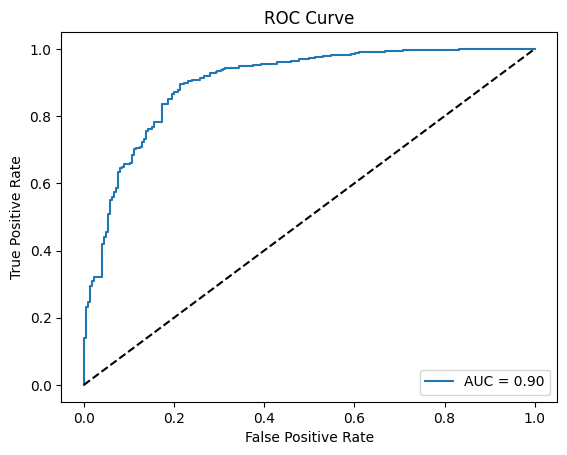

In [36]:
class_names = ["Normal", "Leukemia"]  # change based on your dataset
evaluate_model(model, val_loader, device, class_names)


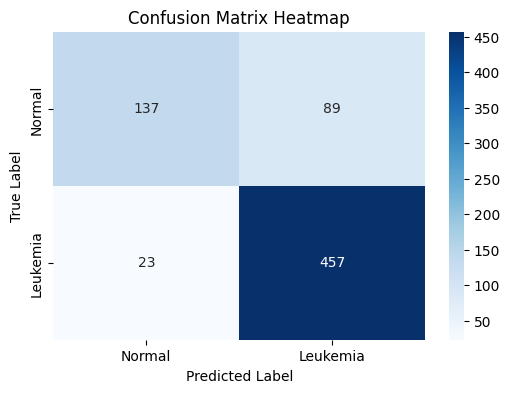

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Call it after evaluation
plot_confusion_matrix([[137, 89], [23, 457]], ["Normal", "Leukemia"])
